# 1 Import cleaned data and required libraries 
- Import cleaned data generated from the previous notebook (`01_Data_Inspection_Cleaning`).
- Import all necessary libraries (please install if you do not have them).
- Inspect the data one more time.

In [17]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_parquet('data/interim/data_outliers_cleared.parquet')
#print information of the cleaned data
print(df.info())
print(df.dtypes)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   number_row        1600 non-null   int64         
 1   name              1600 non-null   string        
 2   album             1600 non-null   string        
 3   release_date      1600 non-null   datetime64[ns]
 4   track_number      1600 non-null   int64         
 5   id                1600 non-null   string        
 6   uri               1600 non-null   string        
 7   acousticness      1600 non-null   float64       
 8   danceability      1600 non-null   float64       
 9   energy            1600 non-null   float64       
 10  instrumentalness  1600 non-null   float64       
 11  liveness          1600 non-null   float64       
 12  loudness          1600 non-null   float64       
 13  speechiness       1600 non-null   float64       
 14  tempo             1600 non-nu

**Data import results:**
- Dataset is cleaned and no more processing are needed to be applied

# 2. Recommend albums and songs based on popularity
- The popularity of each album is calculated as the mean popularity of all songs belonging to that album.
- Recommend the two most popular albums by ranking them according to the mean popularity of all their songs.

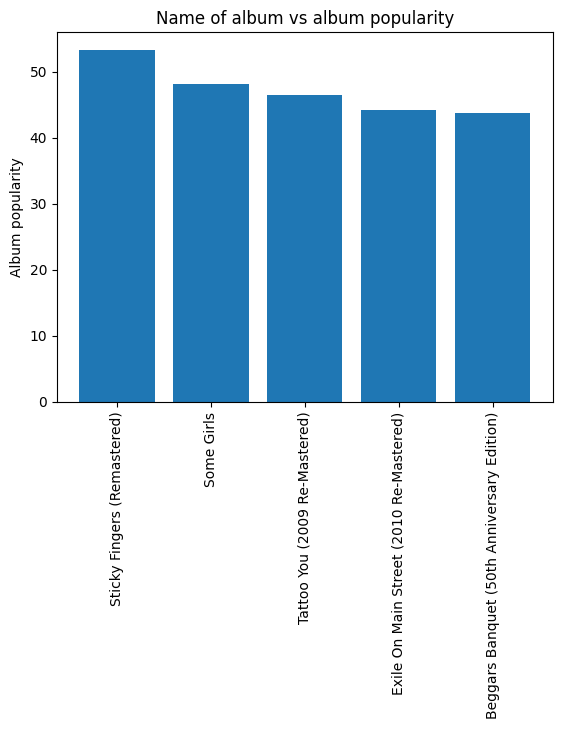

***************************************************************************
Based on the figure, two recommended albums are: 
         first album:  Sticky Fingers (Remastered)
         second album:  Some Girls
**************************************************************************
Based on popularity of songs, five recommended songs are: 
                                                   name  popularity
1403                                    Paint It, Black          80
862                       Start Me Up - Remastered 2009          76
1248                                      Gimme Shelter          76
1472       (I Can't Get No) Satisfaction - Mono Version          76
1257  Sympathy For The Devil - 50th Anniversary Edition          73
**************************************************************************


In [18]:
#Sort albums based on sum of popularity of songs in each album.
grouped = df.groupby('album')['popularity'].mean().sort_values(ascending=False)
#plt.bar()
plt.bar(grouped.index[0:5], grouped[0:5], label=None)
plt.xticks(rotation=90)
plt.ylabel('Album popularity')
plt.title('Name of album vs album popularity')
plt.savefig('plots/Name_album_album_popularity.png')
plt.show()
print('***************************************************************************')
print('Based on the figure, two recommended albums are: ')
print (f'         first album:  {grouped.index[0]}')
print (f'         second album:  {grouped.index[1]}')
print('**************************************************************************')
# Sort DataFrame by 'popularity' column in descending order
df_sorted = df.sort_values(by='popularity', ascending=False)
print('Based on popularity of songs, five recommended songs are: ')
# Show top 5
print(df_sorted.head(5)[['name', 'popularity']])
print('**************************************************************************')

# 3. Examine correlations between song features, especially popularity
- The correlation between variables is calculated, and the corresponding heatmap is plotted.
- From the heatmap, the variables with the strongest positive and strongest negative correlations are identified.
- From the heatmap, the variable with the strongest correlation with popularity is aslo identified.
- Scatterplots of the variables are plotted

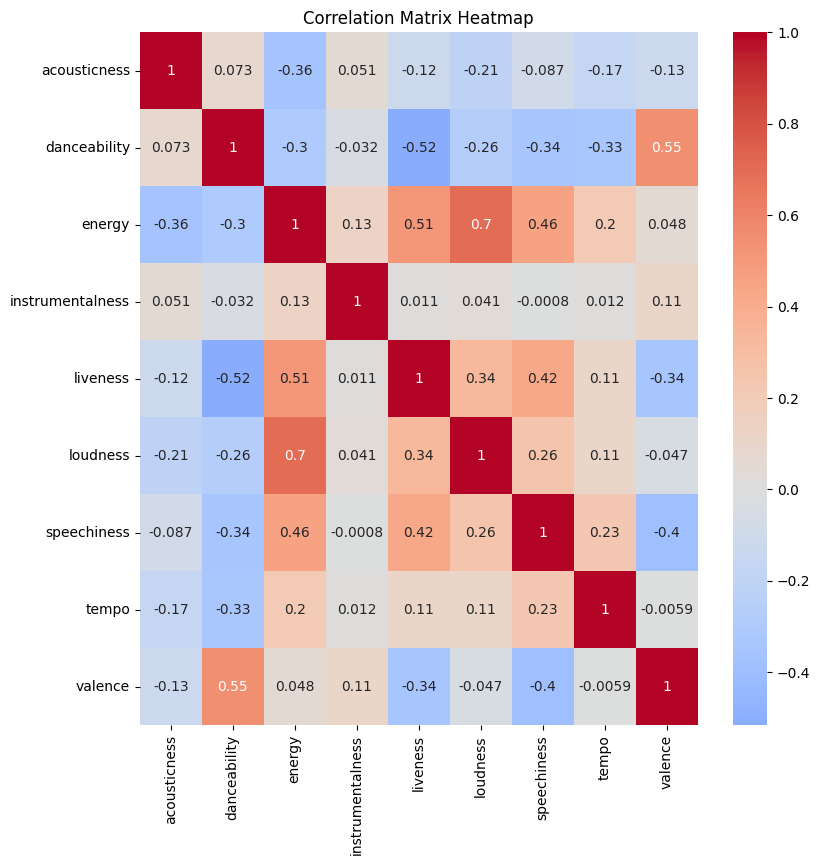

In [19]:
plt.figure(figsize=(9, 9))
corr_matrix = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.savefig('plots/Heat_map_correlationship.png')
plt.show()


**Correlation heatmap findings:**
- Strongest positive correlation between variables: `energy` and `loudness` (correlation: -0.7)
- Strongest negative correlation between variables: `danceability` and `liveness` (correlation: -0.52)
- Strongest correlation with `popularity` is : `liveness` (correlation: -0.21)

**Scatterplots of the variables:**
- Scatter plots of (`energy` vs `loudness`), (`danceability` vs `liveness`), and (`popularity` vs `liveness`) are plotted to detect possible relationships.

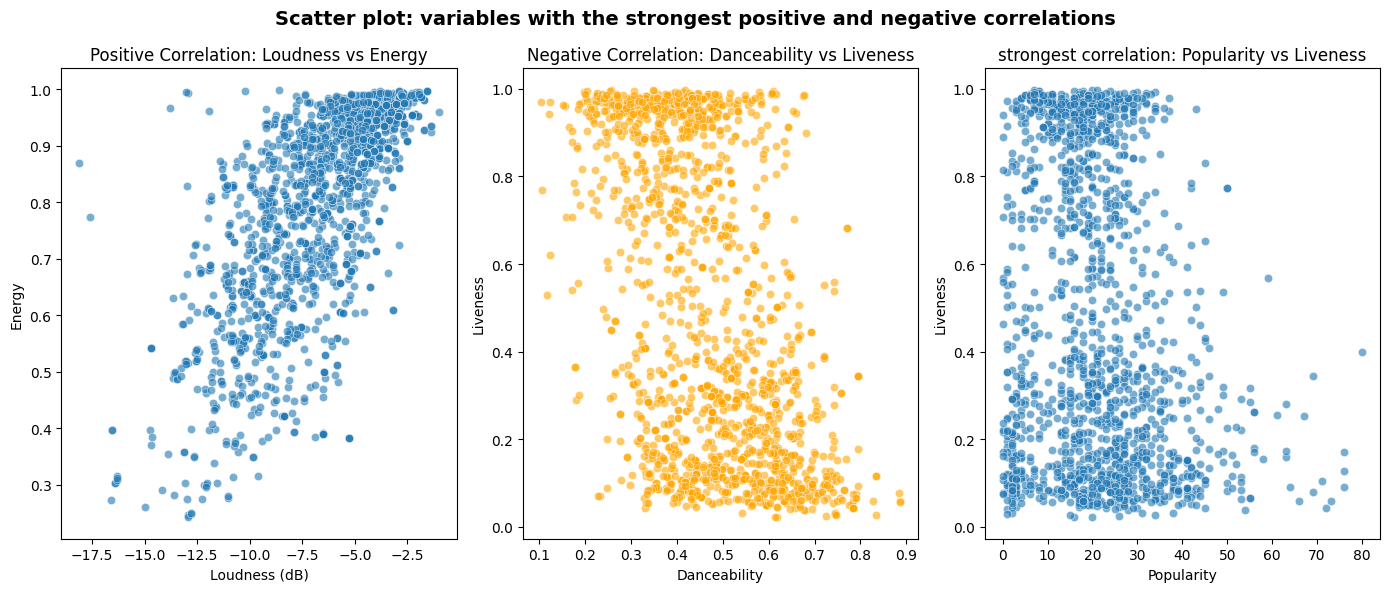

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6)) 
fig.suptitle('Scatter plot: variables with the strongest positive and negative correlations', fontsize=14, fontweight='bold')
# Create first scatter plot (positive correlation)
sns.scatterplot(data=df, x='loudness', y='energy', ax=axes[0], alpha=0.6)
axes[0].set_title('Positive Correlation: Loudness vs Energy')
axes[0].set_xlabel('Loudness (dB)')
axes[0].set_ylabel('Energy')
# Create second scatter plot (negative correlation)
sns.scatterplot(data=df, x='danceability', y='liveness', ax=axes[1], alpha=0.6, color='orange')
axes[1].set_title('Negative Correlation: Danceability vs Liveness')
axes[1].set_xlabel('Danceability')
axes[1].set_ylabel('Liveness')
#Create scatter plot for popularity and liveness (strong correlation between popularity and other variables)
sns.scatterplot(data = df, x= 'popularity', y = 'liveness', ax = axes[2], alpha = 0.6)
axes[2].set_title('strongest correlation: Popularity vs Liveness')
axes[2].set_xlabel('Popularity')
axes[2].set_ylabel('Liveness')
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.savefig('plots/Scatter_plot.png')
plt.show()

**Results of scater plots:**
- It is possible to observe an S-shaped functional pattern between `loudness` and `energy`.
- It is hard to identify any clear pattern between `danceability` and `liveness`.
- It is difficult to detect any clear pattern between `popularity` and `liveness`.

# 3. Analyze popularity trends over time

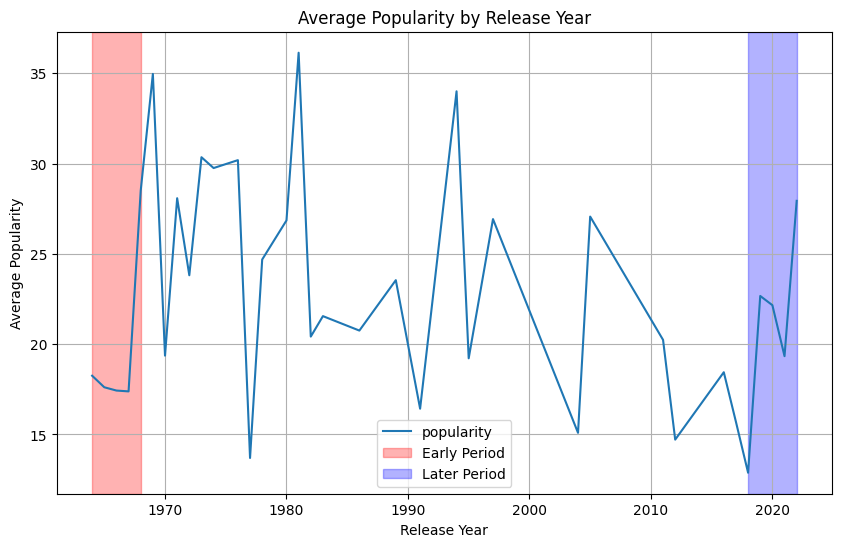

Early period (1964-1968): 19.83
Later period (2018-2022): 20.99
Difference: 1.16


In [31]:
df_annual_mean = df.groupby(df['release_date'].dt.year)['popularity'].mean()
# Sort by year (index) to ensure chronological order
df_annual_mean = df_annual_mean.sort_index()
plt.figure(figsize=(10, 6))
df_annual_mean.plot()
plt.title('Average Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)

# Add markers for the two periods you're comparing
plt.axvspan(df_annual_mean.index[0], df_annual_mean.index[4], alpha=0.3, color='red', label='Early Period')
plt.axvspan(df_annual_mean.index[30], df_annual_mean.index[34], alpha=0.3, color='blue', label='Later Period')
plt.legend()
plt.savefig('plots/Popularity_trend_time.png')
plt.show()

# Print the comparison
early_mean = df_annual_mean.iloc[0:5].mean()
later_mean = df_annual_mean.iloc[30:35].mean()
print(f"Early period ({df_annual_mean.index[0]}-{df_annual_mean.index[4]}): {early_mean:.2f}")
print(f"Later period ({df_annual_mean.index[30]}-{df_annual_mean.index[34]}): {later_mean:.2f}")
print(f"Difference: {later_mean - early_mean:.2f}")

In [25]:
print(df['release_date'].dt.year)

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
1605    1964
1606    1964
1607    1964
1608    1964
1609    1964
Name: release_date, Length: 1600, dtype: int32


In [ ]:
# Song popularity trends over time
- Song popularity has slightly improved from 19.83 in the early period to 20.99 in the later period (↑ 5.85%)
